**Table of content:**
 - [Data Requirements](#data-requirements)
   - [Identify Data Types](#identify-data-types)
   - [List Data Elements](#list-data-elements)
   - [Determine Volume](#determine-volume)
   - [Define Quality Standards](#define-quality-standards)
 - [Data Understanding](#data-understanding)
   - [Data Analysis](#data-analysis)
   - [Data Visualization](#data-visualization)
 - [Data Preperation](#data-preperation)
   - [Data Cleaning](#data-cleaning)
   - [Handeling Missing Data](#handeling-missing-data)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
# Reading the data
data = pd.read_csv('./data/openpowerlifting.csv')

# Display the first few rows of the dataframe
data.head()

C:\Users\timom\AppData\Local\Temp\ipykernel_14868\773332271.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/openpowerlifting.csv')


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


# Data Requirements
**This first step of the Data Provisioning phase builds upon the Data Sourcing section, where you have defined a basic need for data, in relation to the domain and analytic approach. The purpose of this step is as simple as it is essential: what data do you need to achieve your goal? The key is to be very clear and complete about these requirements, as it serves as the basis for the collection of the data, which is the next step in this phase.**



## Identify Data Types
Data comes in various formats, each requiring distinct processing methods. Here are the primary data types required from a dataset:

Numerical Data:
- Age: The age of the athletes.
- BodyweightKg: Body weight of the athletes in kilograms.
- Best3Squat, Best3Bench, Best3Deadlift: Highest lifted weight in their category.
  
Categorical Data:
- Sex: Gender of the athlete.
  
Text Data:
- Not particulary needed in this project.
  
Image Data:
- Not applicable in this project.
  
Time Series Data:
- Not applicable in this project.

## List Data Elements
   
Numerical Data:
- Age
  - Data Type: Numerical
  - Units: Years
  - Range: 19 to 21
- BodyweightKg
  - Data Type: Numerical
  - Units: Kilograms
  - Range: 68 to 73 kg
- Best Lift Attempts (Squat, Bench, Deadlift)
  - Data Type: Numerical
  - Units: Kilograms
  - Range: Varies
- Length
  - Data Type: Numerical
  - Units: Centimeters
  - Range: 177 to 187 cm
  
Categorical Data:
- Sex
  - Data Type: Categorical
  - Categories: "Male"

## Determine Volume
Given that the initial phase of my project involves relatively simple tasks, a smaller dataset should suffice. This approach aligns with the principle that less complex problems typically require less data for effective training and evaluation of an AI model. However, it's important to acknowledge that in the context of weightlifting, factors such as weight, sex, and age are critical determinants of performance. Even slight variations in these parameters can significantly alter outcomes. Therefore, while starting with a smaller dataset is practical, I may need to progressively include more data to accurately capture the nuanced effects of these specific variables as the model develops.

## Define Quality Standards
The data I get must be of high quality to ensure the accuracy of our algorithm, which is crucial for precisely predicting weights for my stakeholder. It's essential that this data encompasses all the previously mentioned elements. If any elements are missing or inadequate, I will explore options for either supplementing or omitting them, depending on the specific circumstances.

# Data Understanding
**Data, analytics, intelligent automation and artificial intelligence have become more mature and are fundamental to the current age of digital transformation. The creation of a data-driven culture helps drive these successful outcomes. However, while most organizations focus on the potential of data-driven technologies our understanding must be carefully cultivated so it becomes a trusted core capability. We need to have a better understanding of the insights data provide using analytics, and how it can improve the way they work.**

## Data analysis
Effective data analysis in powerlifting hinges on understanding various data attributes and their specific properties. This analysis covers numerical data like age, bodyweight, and lift attempts, providing quantifiable insights into athletic performance. Categorical data, such as sex and equipment used, help in identifying trends across different groups. Textual data, including names and event types, offer contextual understanding. 

Numerical Data:

- Age
  - Data Type: Numerical
  - Units: Years (halve years when older than 90)
  - Range: 1 to 95
- BodyweightKg
  - Data Type: Numerical
  - Units: Kilograms
  - Range: 20 to 237.5 kg
- Lift Attempts (Squat, Bench, Deadlift)
  - Data Type: Numerical
  - Units: Kilograms
  - Range: Varies, including negative values (which represent failed attempts)
- Best Lift Attempts (Squat, Bench, Deadlift)
  - Data Type: Numerical
  - Units: Kilograms
  - Range: Varies
  
Categorical Data:
- Sex
  - Data Type: Categorical
  - Categories: "Male", "Female"
- Equipment
  - Data Type: Categorical
  - Categories: Varies (e.g., "Wraps", "Raw")


Text Data:
- Name
  - Data Type: Text
  - Length: Varies
- Event
  - Data Type: Text
  - Length: Short (e.g., "SBD" for Squat, Bench, Deadlift)
- Division
  - Data Type: Text
  - Length: Short to medium (e.g., "F-OR" for Female Open)
- WeightClassKg
  - Data Type: Text
  - Length: Short (e.g., "60" for 60 kg class)
- MeetName
  - Data Type: Text
  - Length: Varies (typically short to medium length)


This dataset contains most of the data that I was looking when I was setting up the requirements. The only significant thing that is missing is the length. I will however continue and hope that the lack of this data will not be significantly affecting the predictability.

## Data visualization
Data visualization plays an integral role in the analysis process, serving as a vital tool for both discovering and communicating insights. It enables analysts to quickly spot issues such as data entry errors, unusual values, or missing information, ensuring the integrity and reliability of the data. Beyond identifying problems, visualization is key in revealing patterns and trends within the data, often providing initial insights before any complex modeling is applied. Additionally, it's an effective way to communicate these findings, making complex data more understandable and accessible for others. This ability to both uncover and convey information visually is what makes data visualization an indispensable part of data analysis.

C:\Users\timom\AppData\Local\Temp\ipykernel_14868\1757496781.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['Sex'] = correlation_data['Sex'].map(sex_mapping)


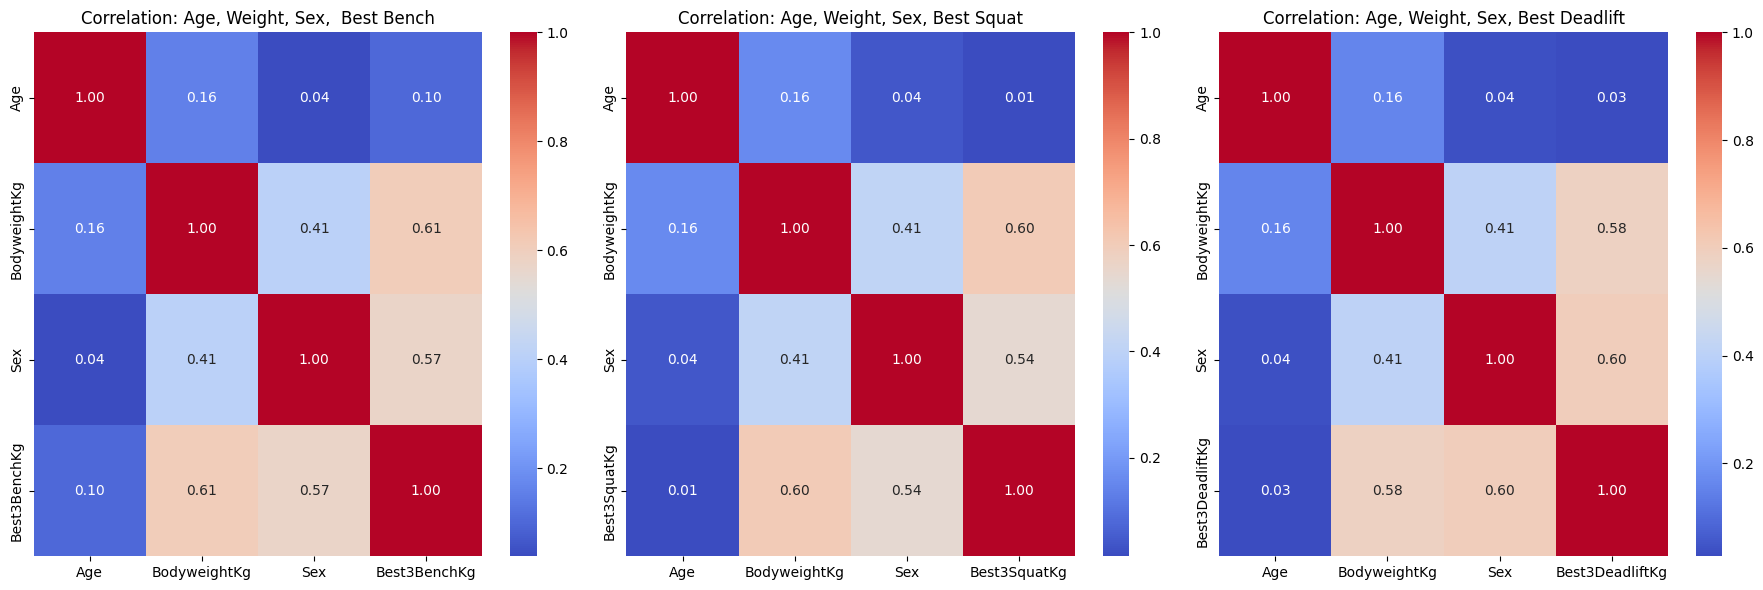

In [3]:

# Selecting the relevant data
correlation_data = data[['Age', 'BodyweightKg', 'Sex', 'Best3BenchKg', 'Best3SquatKg', 'Best3DeadliftKg']]

# Define a mapping from text to integers
sex_mapping = {'F': 0, 'M': 1}

# Use the map function to transform the 'Sex' column
correlation_data['Sex'] = correlation_data['Sex'].map(sex_mapping)

# Correlation for Best Bench Press Performance
correlation_bench = correlation_data[['Age', 'BodyweightKg', 'Sex', 'Best3BenchKg']].corr()

# Correlation for Best Squat Performance
correlation_squat = correlation_data[['Age', 'BodyweightKg', 'Sex', 'Best3SquatKg']].corr()

# Correlation for Best Deadlift Performance
correlation_deadlift = correlation_data[['Age', 'BodyweightKg', 'Sex', 'Best3DeadliftKg']].corr()

# Create heatmaps for each correlation matrix
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(correlation_bench, annot=True, cmap='coolwarm', fmt='.2f', ax=ax[0])
ax[0].set_title('Correlation: Age, Weight, Sex,  Best Bench')

sns.heatmap(correlation_squat, annot=True, cmap='coolwarm', fmt='.2f', ax=ax[1])
ax[1].set_title('Correlation: Age, Weight, Sex, Best Squat')

sns.heatmap(correlation_deadlift, annot=True, cmap='coolwarm', fmt='.2f', ax=ax[2])
ax[2].set_title('Correlation: Age, Weight, Sex, Best Deadlift')

plt.tight_layout()
plt.show()


Firstly I needed to figure out which Features had the most correlation with my target variables. For that I made correlation charts for the features that made the most sense. As you can see in the heatmaps above the bodyweight and sex have the biggest correlation with the 1RM. Surprisingly the age not so much.

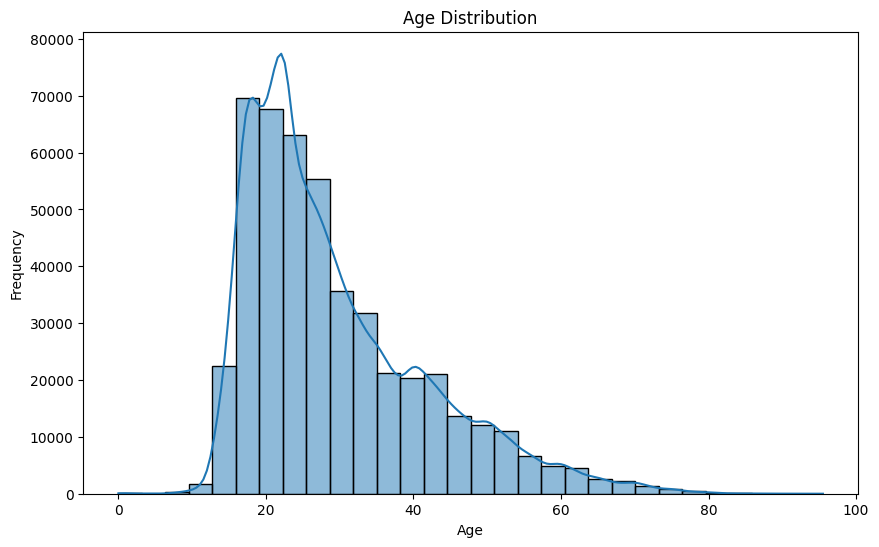

In [4]:
# Filter out negative values from the best lift columns
data = data[(data['Best3SquatKg'] > 0) & (data['Best3BenchKg'] > 0) & (data['Best3DeadliftKg'] > 0)]

# Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Using the graph above I discovered that there is more than enough records on people of the same age as my stakeholder.

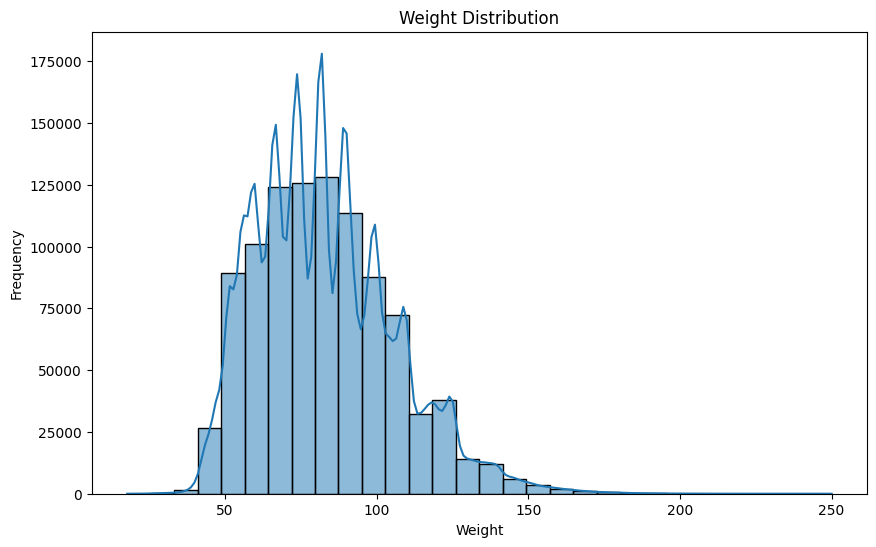

In [5]:
# Filter out negative values from the best lift columns
data = data[(data['Best3SquatKg'] > 0) & (data['Best3BenchKg'] > 0) & (data['Best3DeadliftKg'] > 0)]

# Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['BodyweightKg'], bins=30, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


Using the graph above I discovered that there is more then enough data on people with roughly the same weight as my stakeholder.

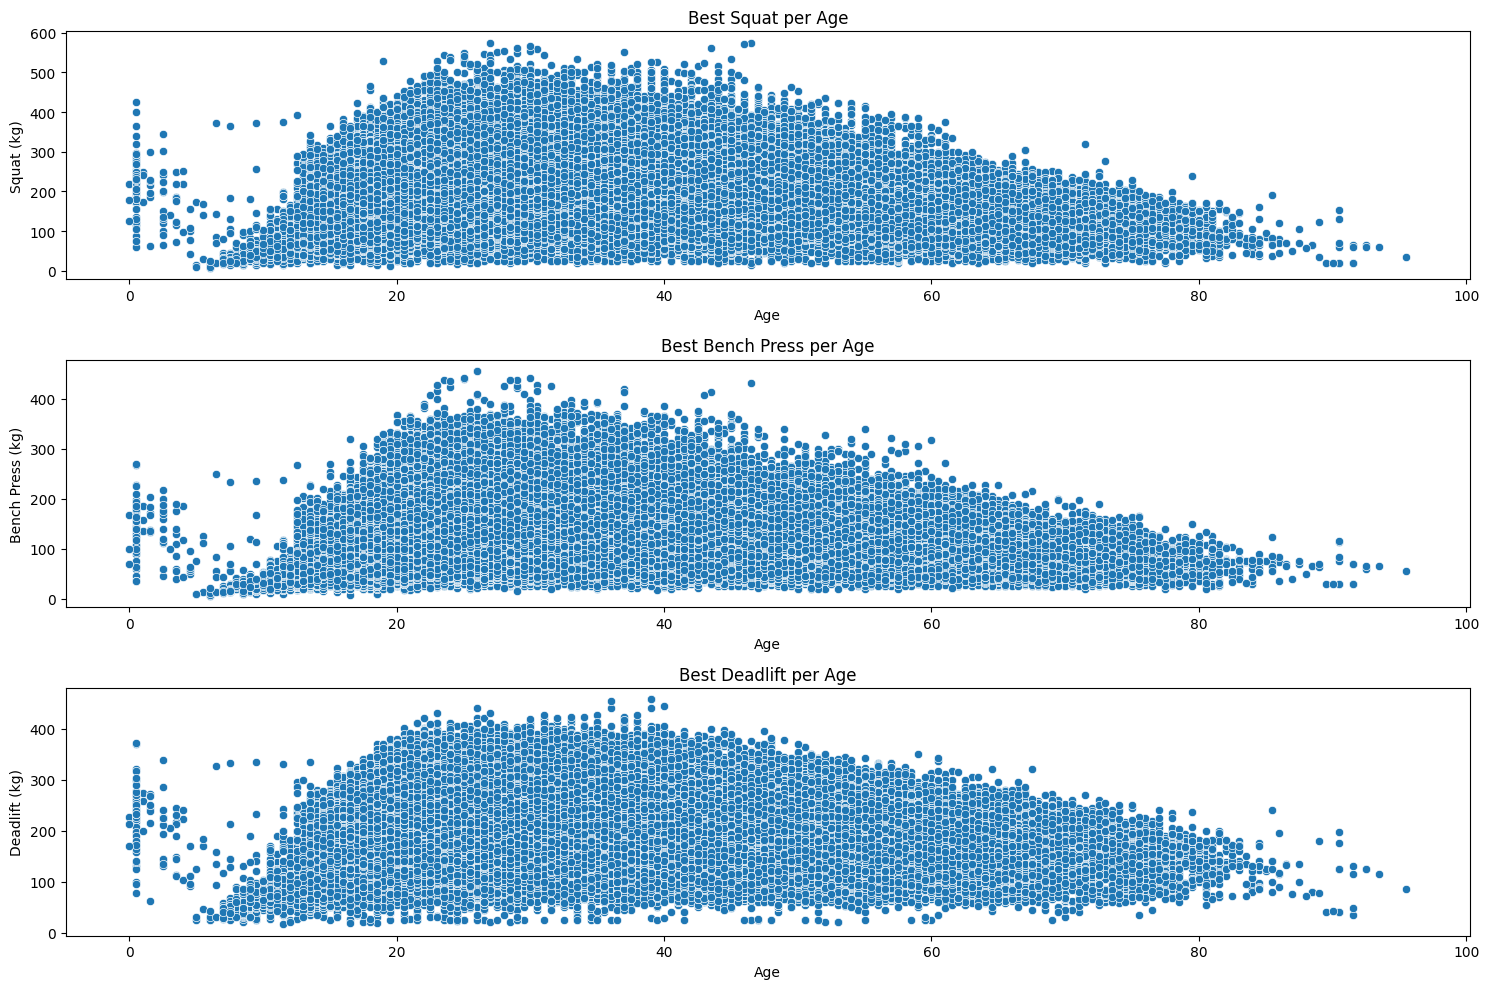

In [6]:
# Scatter Plot for Best Lift Results per Age
plt.figure(figsize=(15, 10))

# Squat
plt.subplot(3, 1, 1)
sns.scatterplot(x='Age', y='Best3SquatKg', data=data)
plt.title('Best Squat per Age')
plt.ylabel('Squat (kg)')

# Bench Press
plt.subplot(3, 1, 2)
sns.scatterplot(x='Age', y='Best3BenchKg', data=data)
plt.title('Best Bench Press per Age')
plt.ylabel('Bench Press (kg)')

# Deadlift
plt.subplot(3, 1, 3)
sns.scatterplot(x='Age', y='Best3DeadliftKg', data=data)
plt.title('Best Deadlift per Age')
plt.xlabel('Age')
plt.ylabel('Deadlift (kg)')

plt.tight_layout()
plt.show()

As you can see above I tried to visualize how age affects the best attempts by the contistants. For me it looks like all 3 exercises have roughly the same curve with few exceptions. Also I noticed that the average for the best squat is significantly higher than the other exercises.

Using the same method I found out that there are no missing values in the targets for the prediction.

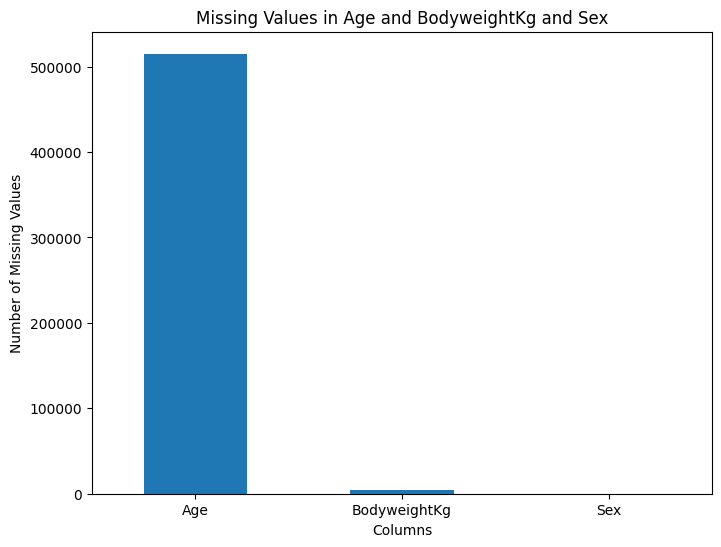

In [7]:
# Count missing values in Age, BodyweightKg and Sex columns
missing_values = data[['Age', 'BodyweightKg', 'Sex']].isnull().sum()

# Create a bar chart
plt.figure(figsize=(8, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Age and BodyweightKg and Sex')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=0)
plt.show()

As seen in the graph above it looks like there are a lot of records that have an empty age field. As this is one of the most important features I'm going to try to get more information about that. A way I can try to do so is to try to get their age as an average of the age-group. Which is a range of ages.

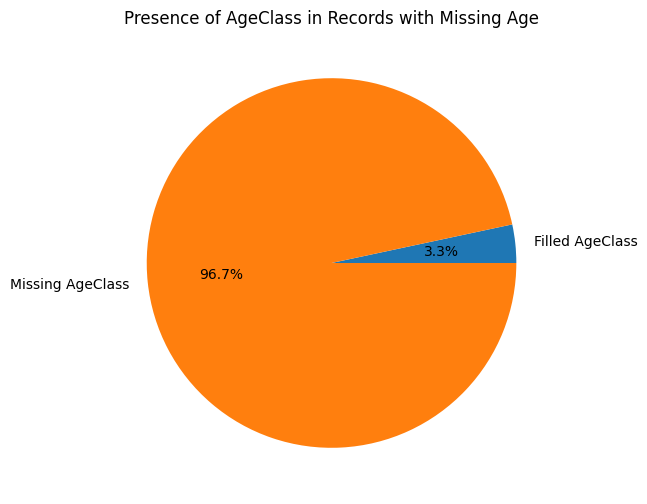

In [8]:
# Filter records where 'Age' is missing
missing_age_data = data[data['Age'].isna()]

# Count the number of records with filled and missing 'AgeClass' fields
filled_age_class_count = missing_age_data['AgeClass'].notna().sum()
missing_age_class_count = missing_age_data['AgeClass'].isna().sum()

# Prepare data for the pie chart
age_class_presence_data = {'Filled AgeClass': filled_age_class_count, 'Missing AgeClass': missing_age_class_count}

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_class_presence_data.values(), labels=age_class_presence_data.keys(), autopct='%1.1f%%')
plt.title('Presence of AgeClass in Records with Missing Age')
plt.show()


I was dissapointed to find out that only 3.3% of people with a missing age had a AgeClass. Converting the AgeClass to their predicted Age, will therefore most likely not make the biggest difference.

# Data Preperation
**Having collected, combined and/or integrated data, does not automatically mean that the data is useful for the next phase Predictions, where it serves as input for modeling. To ensure or improve the data's usefulness for applied data science projects, you need to check its quality and prepare the data for the next phase.**

## Data Cleaning
I have tested for the following possible issues but this dataset seems to be a clean one. There are some blank cells but more about that in the next part about handeling missing data.
- Whitespace and new lines
- Blank cells
- Fixing numbers that aren’t numbers
- Structural problems

In [9]:
# Ensure all the values in the specified columns are either numbers or NaN
for column in ['Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg', 'BodyweightKg', 'Age']:
    data[column] = pd.to_numeric(data[column], errors='coerce')

## Handeling Missing Data
Handling missing values is a pivotal challenge in my role as a data scientist. If not managed carefully, it could lead to an analysis that is not only ineffective but also misleading, potentially causing harm to business stakeholders.

In the dataset at hand, a significant number of individuals have missing age information. To address this, my approach involves imputing ages for those who have an indicated age group. While this strategy seems reasonable, it is important to acknowledge that it relies on the assumption that the average age of each group accurately represents its members. This could notably alter the data.

For individuals lacking both age and age-group information, I have made the decision to exclude their records. It's important to recognize that this choice might introduce a significant bias into the dataset. The reason for the missing age data is unclear, and it could be systematically related to certain age groups. Without a deeper understanding of how the data was collected and the possible reasons behind these omissions, it's challenging to assess the full impact of this decision.

Similarly, for other features with minimal missing data, I plan to remove the records of those individuals. While this seems like a straightforward solution, it's important to be aware that this too could affect the representativeness and integrity of the dataset.

In [10]:
cleaned_data = data

# Initial number of individuals with missing age
initial_missing_age_count = cleaned_data['Age'].isna().sum()

# Number of individuals removed (those who had both Age and AgeClass missing)
removed_due_to_missing_ageclass = cleaned_data[
    cleaned_data['Age'].isna() & 
    cleaned_data['AgeClass'].isna()
].shape[0]

# Number of individuals whose ages were imputed
ages_imputed_count = initial_missing_age_count - removed_due_to_missing_ageclass
# Filter out entries where both Age and AgeClass are missing
cleaned_data = cleaned_data.dropna(subset=['Age', 'AgeClass'], how='all')

# Calculate mean age for each AgeClass (excluding NaN values in Age)
mean_ages_by_ageclass = cleaned_data.groupby('AgeClass')['Age'].mean()

# Assign mean age to missing ages
cleaned_data['Age'] = cleaned_data.apply(
    lambda row: mean_ages_by_ageclass[row['AgeClass']] if pd.isna(row['Age']) else row['Age'],
    axis=1
)

initial_missing_age_count, removed_due_to_missing_ageclass, ages_imputed_count


C:\Users\timom\AppData\Local\Temp\ipykernel_14868\2050632395.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Age'] = cleaned_data.apply(


(515139, 497884, 17255)

In [11]:
# Removing NA data
cleaned_data = cleaned_data[
    (cleaned_data[['BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']] >= 0).all(axis=1) &
    cleaned_data[['BodyweightKg', 'Sex', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']].notna().all(axis=1)
]

## Pre-Processing Data
In addition to basic data preparation tasks such as cleaning, rearranging, or reformatting datasets, there are more involved methods of transforming data into new or derived forms. This step, often termed 'pre-processing', is a crucial phase of data preparation. It sometimes overlaps with the actual data processing stage, particularly when no further extensive processing is required.

For this project, I have chosen to filter out individuals whose bodyweight significantly deviates from the stakeholder's bodyweight and those of a different sex. The range I've retained is still broad, allowing for flexibility in experimenting with optimal ranges during the prediction phase.

Conversely, I have opted not to filter based on age at this stage. The preliminary analysis indicated a minimal correlation between age and the target variables. Therefore, I plan to continue exploring the impact of age in the subsequent project phase, carrying all age data forward for comprehensive experimentation.

In [12]:
# Columns to keep
columns_to_keep = [
    'Sex', 'Age', 'BodyweightKg', 'AgeClass',
    'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
    'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg',
    'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg'
]

# Creating a new df with only the selected columns
cleaned_data = cleaned_data[columns_to_keep]

# Display the first few rows of the cleaned df
cleaned_data.head()

,Sex,Age,BodyweightKg,AgeClass,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg
0,F,29.0,59.8,24-34,80.0,92.5,105.0,105.0,45.0,50.0,55.0,55.0,110.0,120.0,130.0,130.0
1,F,29.0,58.5,24-34,100.0,110.0,120.0,120.0,55.0,62.5,67.5,67.5,130.0,140.0,145.0,145.0
3,F,23.0,60.0,20-23,-105.0,-105.0,105.0,105.0,67.5,72.5,-75.0,72.5,132.5,-140.0,-140.0,132.5
4,F,45.0,104.0,45-49,120.0,130.0,140.0,140.0,70.0,75.0,80.0,80.0,150.0,160.0,170.0,170.0
5,F,37.0,74.0,35-39,127.5,135.0,142.5,142.5,72.5,77.5,82.5,82.5,125.0,135.0,145.0,145.0


The columns in `columns_to_keep` are essential for a focused analysis in strength sports like powerlifting:

1. **Sex**: Important for gender-based performance analysis.
2. **Age**: Influences athletic performance; key for age-related analysis.
3. **BodyweightKg**: Critical for weight class comparisons and strength-to-weight ratios.
4. **AgeClass**: Useful for comparing performance within similar age groups.
5. **Squat, Bench, Deadlift Attempts (1Kg, 2Kg, 3Kg)**: Provide insights into an athlete's strategy and consistency across each lift.
6. **Best3SquatKg, Best3BenchKg, Best3DeadliftKg**: Indicate the athlete's peak performance in each core lift, essential for ranking and progress analysis.

In [13]:
# Define a mapping from text to integers
sex_mapping = {'F': 0, 'M': 1}

# Use the map function to transform the 'Sex' column
cleaned_data['Sex'] = cleaned_data['Sex'].map(sex_mapping)

# Filtering on bodyweight and sex
filtered_data = cleaned_data[
    (cleaned_data['BodyweightKg'] >= 68) &
    (cleaned_data['BodyweightKg'] <= 75) &
    (cleaned_data['Best3SquatKg'] >= 0) &
    (cleaned_data['Best3BenchKg'] >= 0) &
    (cleaned_data['Best3DeadliftKg'] >= 0) &
    (cleaned_data['Sex'] == 1)
]

individual_count = filtered_data.shape[0]
individual_count

42946

I have decided to export the dataset to a csv file. That way I can use it in during the Prediction phase.

In [16]:
# Path to the directory
directory = './data/'

# File names
current_file = 'filtered_data.csv'
backup_file = 'filtered_data_backup.csv'

# Full paths
current_file_path = os.path.join(directory, current_file)
backup_file_path = os.path.join(directory, backup_file)

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Check if the backup file exists and delete it
if os.path.isfile(backup_file_path):
    os.remove(backup_file_path)

# Check if the current file exists and rename it to the backup
if os.path.isfile(current_file_path):
    os.rename(current_file_path, backup_file_path)

# Save the current dataframe to CSV
filtered_data.to_csv(current_file_path, index=False)